In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [34]:
# import dataset

df = pd.read_csv('D:\\DS\\Probability Exam\\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='bmi', ylabel='charges'>

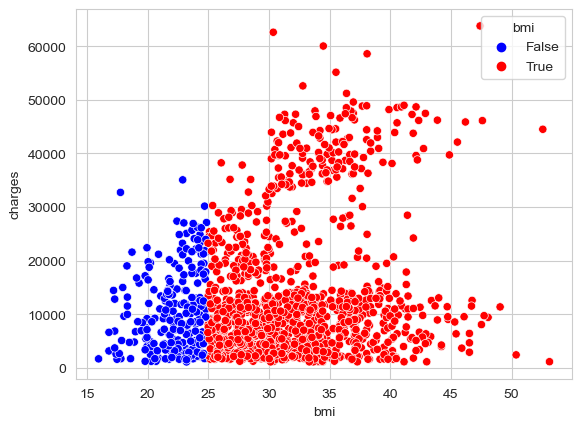

In [44]:
# previously we find interesting relationship between smoking, high BMI and more than median medical cost
# let's dig deeper into the correlation between those two variables with medical cost
# for visualization, let's plot it into scatterplot

sns.set_style('whitegrid')
sns.scatterplot(data=df, x='bmi', y='charges', hue=df['bmi'] > 24.9, palette={True: 'red', False: 'blue'})

In [ ]:
# based on the scatterplot, looks like high bmi and high charges have weak correlation, let's put it to the test

In [52]:
# Calculate the correlation

df[['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [53]:
# Calculate the covariance
df[['bmi', 'charges']].cov()

,bmi,charges
bmi,37.187884,1.464730e+04
charges,14647.304426,1.466524e+08


In [ ]:
# this suggest a very weak, positive relationship between BMI and medical charges
# let's take a look at smoker vs medical charges

<Axes: xlabel='smoker', ylabel='charges'>

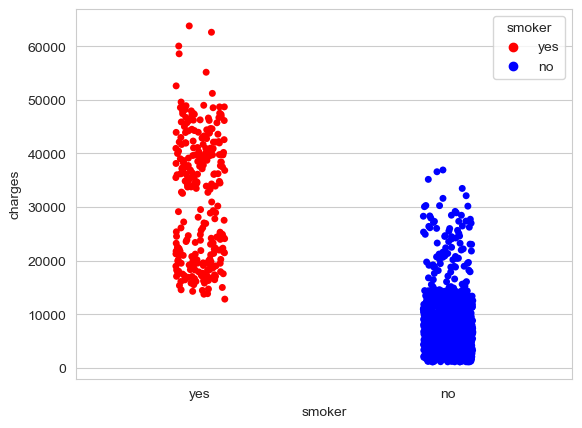

In [56]:
sns.set_style('whitegrid')
sns.stripplot(data=df, x='smoker', y='charges', hue='smoker', palette={'yes': 'red', 'no': 'blue'})

In [59]:
# looks like it almost the same with bmi & medical charges variable, let's take a look at the correlation & covariance
# for the record, since smoker is a categorical variable, we need to encode it into binary (yes=0, no=1)

binary_smoker = df["smoker"].map({"yes": 1, "no": 0})

# correlation
df[['charges', 'binary_smoker']].corr()

,charges,binary_smoker
charges,1.000000,-0.787251
binary_smoker,-0.787251,1.000000


In [60]:
# covariance
df[['charges', 'binary_smoker']].cov()

,charges,binary_smoker
charges,1.466524e+08,-3848.667032
binary_smoker,-3.848667e+03,0.162969


In [ ]:
# the variance is quite wild, but it showed stronger relationship between medical cost and smoking
# conclusion: while individuals who smokes and have high BMI have potential for intersection
# cost-wise, smoking is more detrimental compared to have high BMI

In [61]:
# let's move forward to hypothetical testing, which we just want to confirm
# whether smoker have medical charges higher than the mean (previously the entire medical charges mean is at 13270)

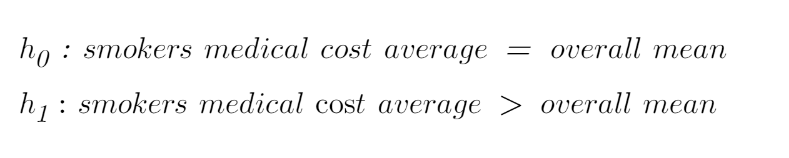

In [73]:
# we will treat the insurance dataset as an sample and we dont know the std of the population
# hence, using t-test, right-tailed

from scipy.stats import levene, ttest_ind, stats

smoker_filter = df[df["smoker"] == "yes"]
smokers_charges = smoker_filter['charges']
overall_mean = df['charges']

# we do have to note, charges distribution is 'technically' not a normal distribution, eventhough the len is more than 30
# so we need to decide whether to use t-test or welch's t-test

levene_test = levene(smokers_charges, overall_mean)
levene_test.pvalue

0.0032409037001783297

In [76]:
# the result was under 0.05, there is significant variances, we will use the welch's t-test

t_statistic, p_value = stats.ttest_ind(smokers_charges, overall_mean, alternative='greater', equal_var=False)
t_statistic, p_value

(24.330674815139588, 1.3609741371835991e-81)

In [77]:
# based on the t-statistic value, it shows positive outward for the smokers' average medical cost (much higher than the average)
# while the p-value is very very much low, indicating that we can reject the null hypothesis